In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [380]:
sns.set_style('darkgrid')

In [405]:
def plot_categorical_distribution(df, column_name, title):
    print(Counter(df[column_name]))
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette="viridis")
    plt.title(title)
    plt.xlabel(column_name.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [411]:
def plot_numerical_distribution(df, column_name, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, bins=10, kde=True, color="blue")
    plt.title(title)
    plt.xlabel(column_name.capitalize())
    plt.ylabel("Frequency")
    plt.show()

In [418]:
# Analyze the responses for each survey type
def plot_response_by_survey_type(df):
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x='survey_type', hue='response', palette='viridis')
    plt.title('Responses by Survey Type')
    plt.xlabel('Survey Type')
    plt.ylabel('Count')
    plt.legend(title='Response')
    plt.show()

## Load data

In [373]:
demographic_df = pd.read_csv('demographic_data.csv')
interaction_df = pd.read_csv('interaction_data.csv')

In [374]:
demographic_df.head(10)

,user_id,age,gender,occupation,income,interests,city
0,1,41,Male,Unemployed,74556,Technology,Rome
1,2,22,Male,Unemployed,45083,Travel,Verona
2,3,54,Female,Unemployed,26458,Travel,Taranto
3,4,67,Other,Doctor,137250,Technology,Florence
4,5,66,Other,Unemployed,138652,Fashion,Brescia
5,6,18,Male,Doctor,132425,Travel,Genoa
6,7,37,Other,Teacher,60737,Finance,Venice
7,8,24,Male,Unemployed,94565,Finance,Verona
8,9,53,Other,Teacher,65586,Sports,Padua
9,10,35,Other,Unemployed,112883,Sports,Taranto


In [375]:
interaction_df.head(10)

,user_id,survey_type,response
0,2704,Finance,No
1,13702,Fashion,No
2,14182,Fashion,No
3,5394,Sports,Yes
4,7739,Sports,Yes
5,19886,Fashion,Neutral
6,3487,Fashion,Neutral
7,23363,Finance,Neutral
8,17895,Finance,No
9,23763,Fashion,Yes


In [378]:
demographic_df.describe()

,user_id,age,income
count,30000.000000,30000.000000,30000.000000
mean,15000.500000,43.544167,85243.382933
std,8660.398374,14.987949,37487.360515
min,1.000000,18.000000,20003.000000
25%,7500.750000,31.000000,52763.000000
50%,15000.500000,44.000000,85241.500000
75%,22500.250000,56.000000,117935.500000
max,30000.000000,69.000000,149992.000000


In [376]:
interaction_df.describe()

,user_id
count,90000.000000
mean,15012.640233
std,8660.701755
min,1.000000
25%,7512.000000
50%,15055.000000
75%,22542.000000
max,30000.000000


## Demographic Data Visualization

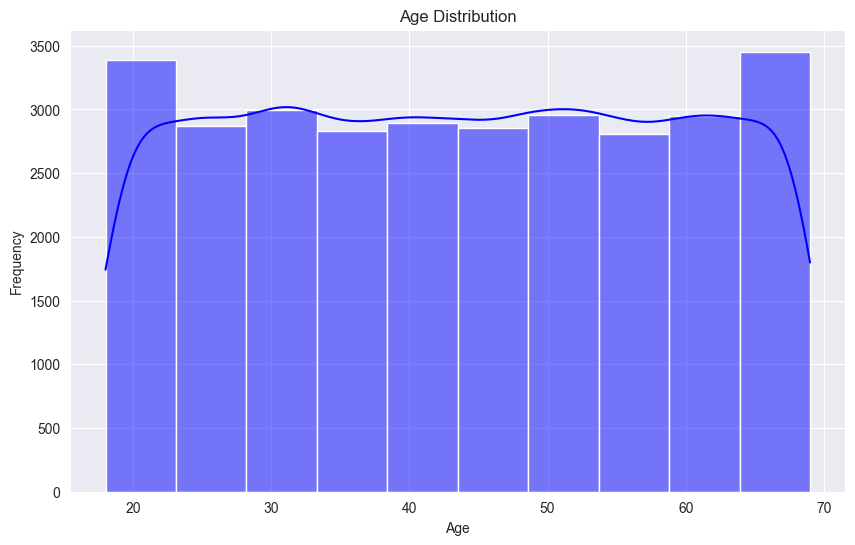

In [412]:
# Age distribution
plot_numerical_distribution(demographic_df, "age", "Age Distribution")

Counter({'Female': 10060, 'Male': 9977, 'Other': 9963})


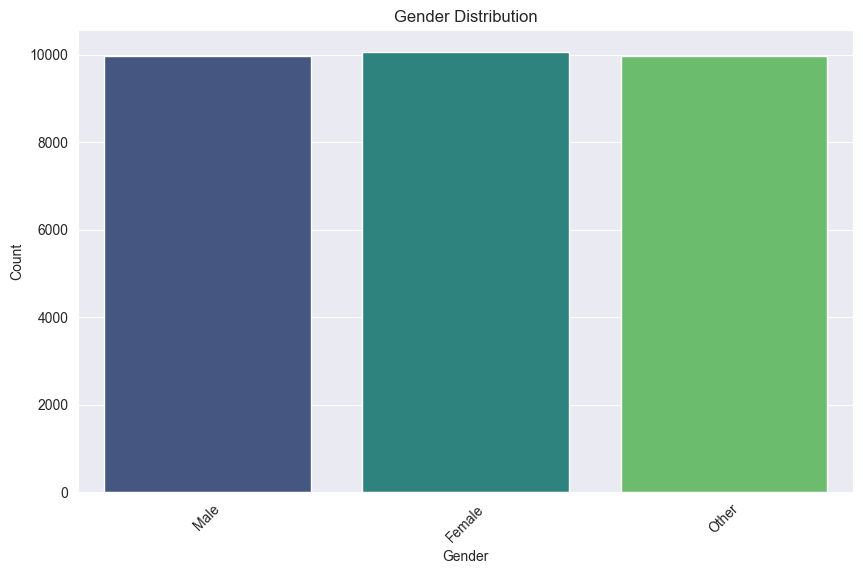

In [413]:
# Gender distribution
plot_categorical_distribution(demographic_df, "gender", "Gender Distribution")

Counter({'Teacher': 5084, 'Engineer': 5067, 'Doctor': 5066, 'Artist': 4966, 'Unemployed': 4913, 'Lawyer': 4904})


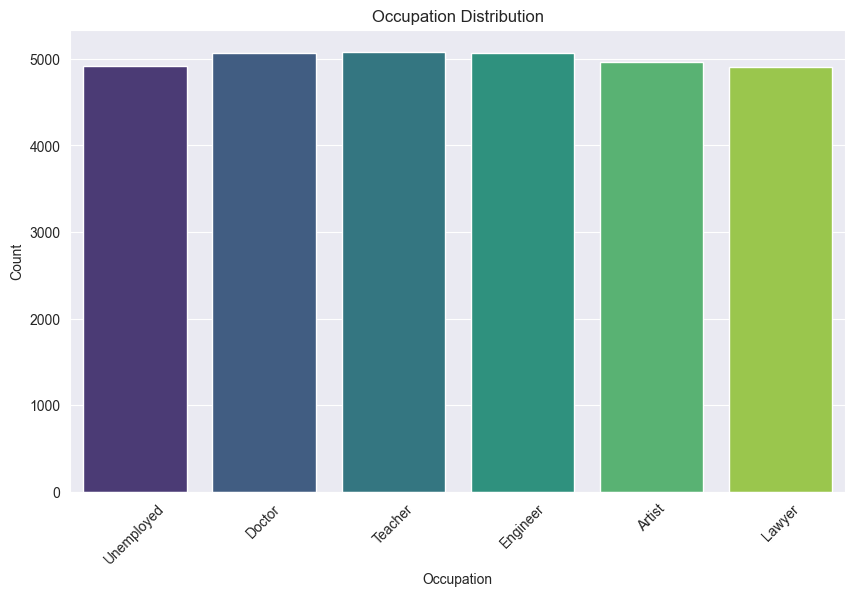

In [414]:
# Occupation distribution
plot_categorical_distribution(demographic_df, "occupation", "Occupation Distribution")

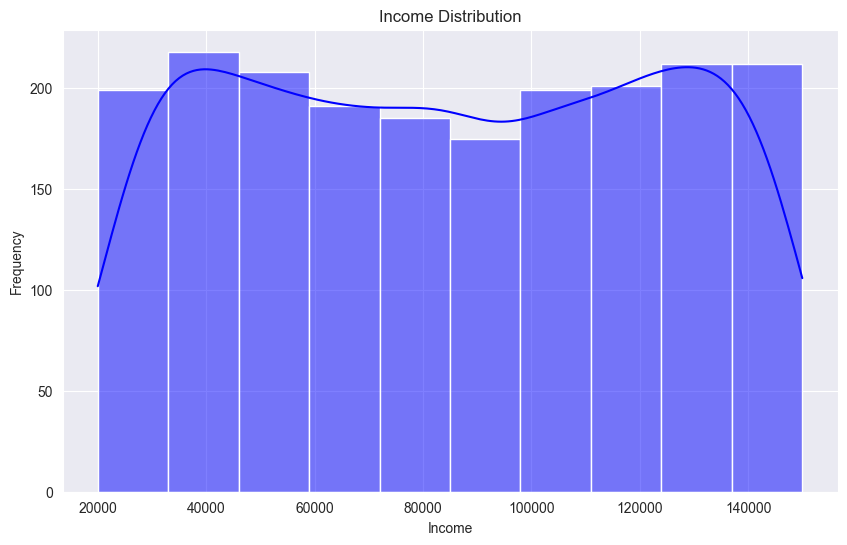

In [415]:
# Income distribution
plot_numerical_distribution(df, "income", "Income Distribution")

Counter({'Travel': 5098, 'Finance': 5019, 'Technology': 5003, 'Politics': 4987, 'Sports': 4980, 'Fashion': 4913})


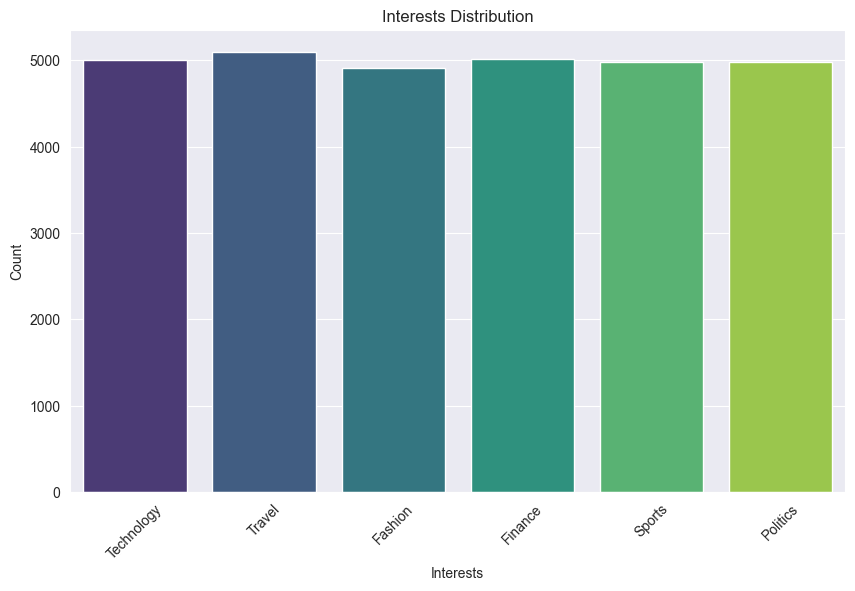

In [416]:
# Interests distribution
plot_categorical_distribution(demographic_df, "interests", "Interests Distribution")

Counter({'Brescia': 1563, 'Bologna': 1553, 'Verona': 1538, 'Padua': 1538, 'Naples': 1529, 'Parma': 1523, 'Venice': 1517, 'Trieste': 1515, 'Genoa': 1503, 'Florence': 1500, 'Messina': 1500, 'Palermo': 1498, 'Turin': 1483, 'Catania': 1481, 'Reggio Calabria': 1476, 'Rome': 1474, 'Taranto': 1474, 'Milan': 1468, 'Modena': 1452, 'Bari': 1415})


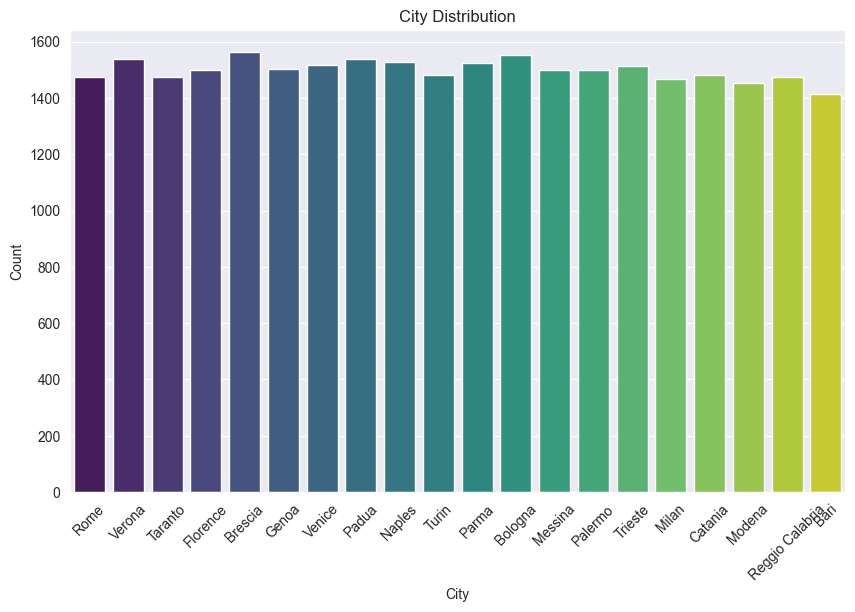

In [417]:
# City distribution
plot_categorical_distribution(demographic_df, "city", "City Distribution")

### Demographic Feature Analysis

The demographic data shows that all features (age, gender, occupation, income, interests, and city) are uniformly distributed. This indicates a balanced representation across different categories and numerical ranges for each feature.

## Interaction Data Visualization

Counter({'Politics': 15058, 'Finance': 15030, 'Technology': 15024, 'Sports': 14971, 'Travel': 14967, 'Fashion': 14950})


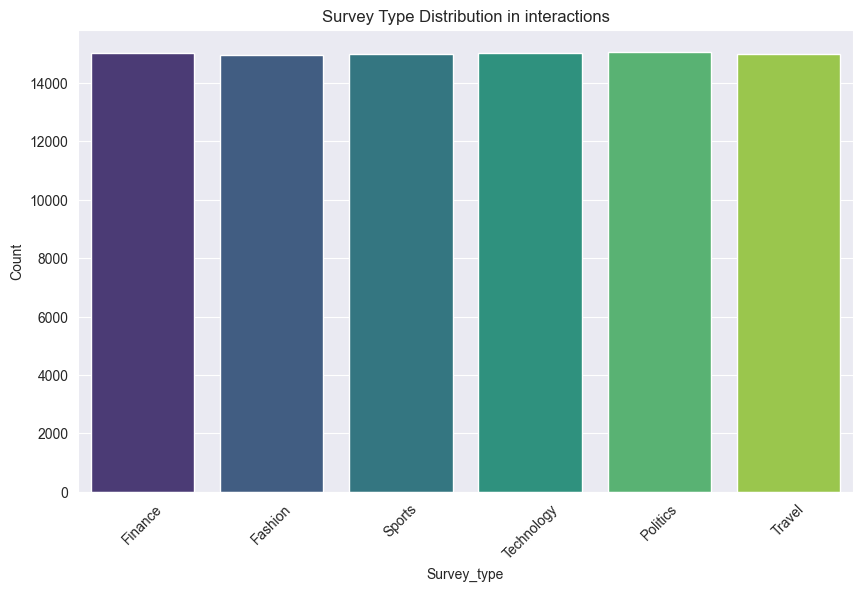

In [421]:
plot_categorical_distribution(interaction_df, 'survey_type', "Survey Type Distribution in interactions")

Counter({'Yes': 30247, 'No': 29902, 'Neutral': 29851})


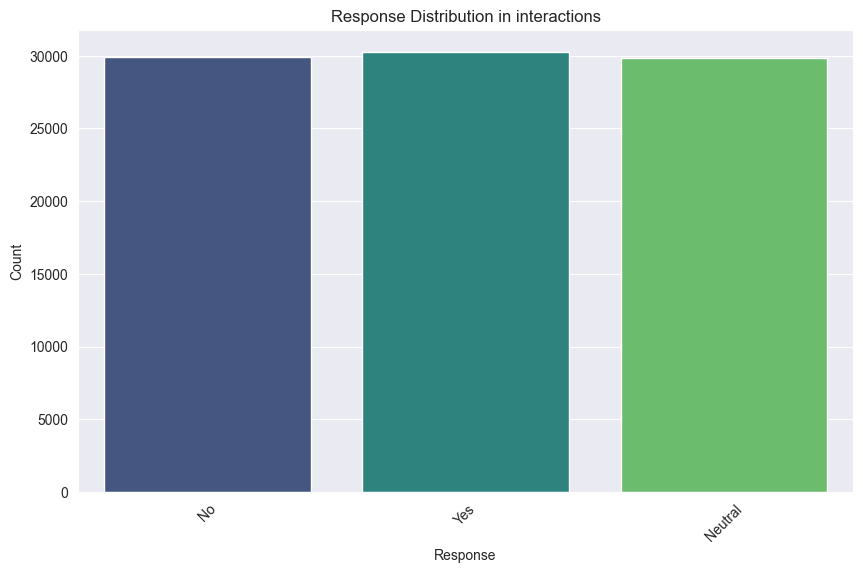

In [422]:
plot_categorical_distribution(interaction_df, 'response', "Response Distribution in interactions")

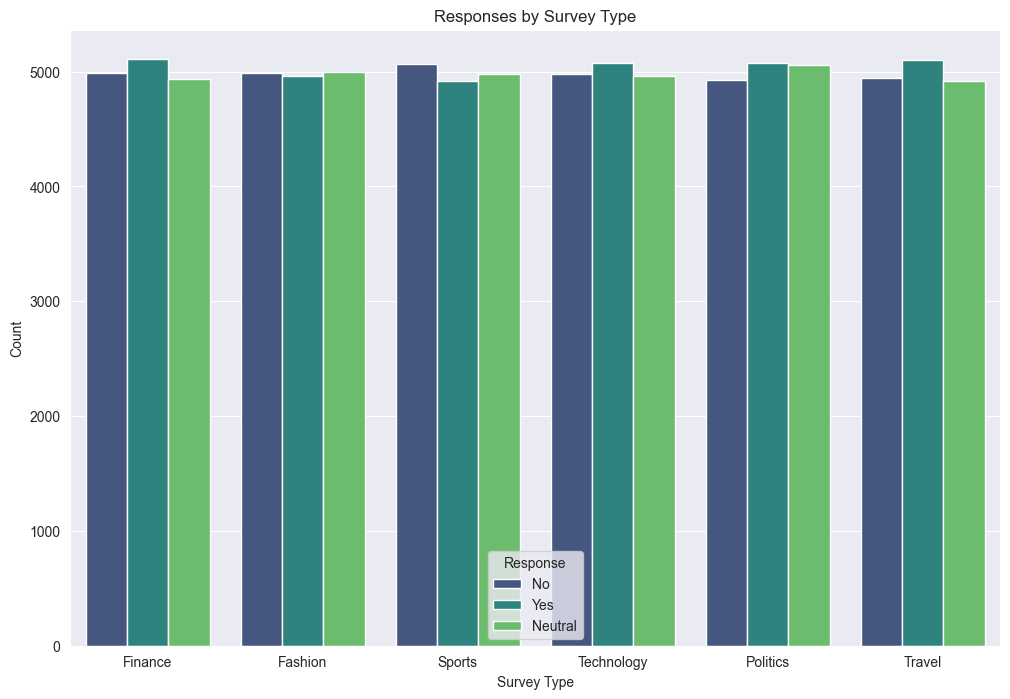

In [419]:
plot_response_by_survey_type(interaction_df)

In [429]:
# Calculate the number of interactions per user
interaction_counts_df = interaction_df['user_id'].value_counts().reset_index()
interaction_counts_df.columns = ['user_id', 'interaction_count']

# Display the interaction counts
interaction_counts_df

,user_id,interaction_count
0,18782,14
1,11933,12
2,8138,11
3,27364,11
4,25974,11
...,...,...
28510,19418,1
28511,16703,1
28512,20506,1
28513,12211,1


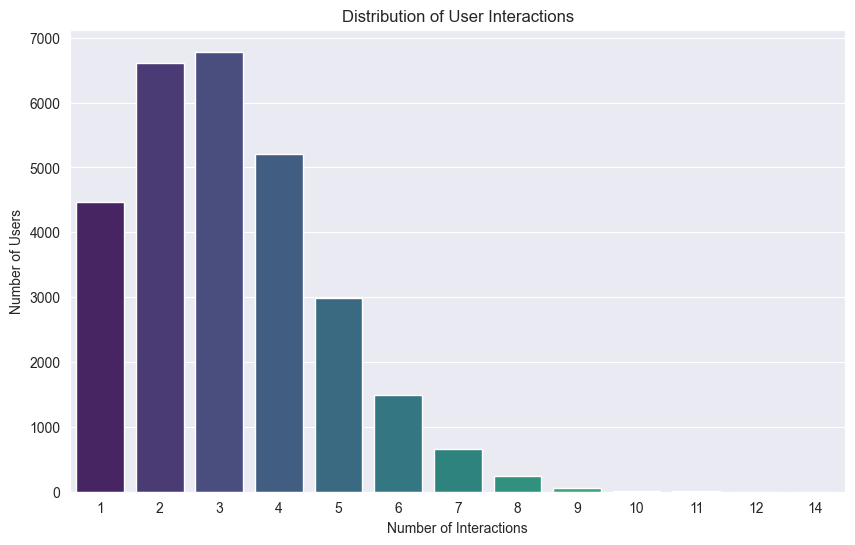

In [430]:
# Plot the distribution of user interactions
def plot_user_interaction_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='interaction_count', palette='viridis')
    plt.title('Distribution of User Interactions')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Users')
    plt.show()

plot_user_interaction_distribution(interaction_counts_df)

### Interaction Feature Analysis
#### Distribution of User Interactions:
The majority of users have between 1 to 4 interactions, with the number of users progressively decreasing as the number of interactions increases. This indicates a skewed distribution where a smaller group of users has a higher number of interactions.

#### Responses by Survey Type: 
Responses are uniformly distributed across different survey types (Finance, Fashion, Sports, Technology, Politics, Travel). Each survey type has a similar number of 'Yes', 'No', and 'Neutral' responses, indicating no significant preference or bias towards any particular response type within each survey category.

#### Overall Response Distribution: 
The overall responses are balanced, with 'Yes', 'No', and 'Neutral' responses being almost equal in count. This suggests that the survey responses are well-distributed and do not exhibit a dominant response category.

## Preprocessing

In [482]:
# Define interests columns
interests_columns = ['Sports', 'Finance', 'Politics', 'Fashion', 'Technology', 'Travel']
interation_columns = ['Fashion_interaction', 'Finance_interaction', 
                                                'Politics_interaction', 'Sports_interaction', 
                                                'Technology_interaction', 'Travel_interaction']
region_column = "region"
occupation_category_column = "occupation_category"
age_group_column = "age_group"
age_group_name_column = "age_group_name"
income_quintile_column = "income_quintile"
income_quintile_name_column = "income_quintile_name"

# Define mapping between cities and regions in Italy
region_mapping = {
    'Northern Italy': {'Milan', 'Turin', 'Genoa', 
                       'Bologna', 'Venice', 'Verona', 'Brescia',
                         'Trieste', 'Padua', 'Modena', 'Parma'},
    'Central Italy': {'Rome', 'Florence'},
    'Southern Italy': {'Naples', 'Bari', 'Taranto', 'Reggio Calabria'},
    'Insular Italy': {'Palermo', 'Catania', 'Messina'}
}

# Define occupation mapping between occupations and categories
occupation_mapping = {
    'Doctor': 'Highly Specialized Professions',
    'Lawyer': 'Highly Specialized Professions',
    'Engineer': 'Highly Specialized Professions',
    'Artist': 'Creative and Educational Professions',
    'Teacher': 'Creative and Educational Professions',
    'Unemployed': 'General Employment Status'
}

# Define the age bins and corresponding labels
age_bins = [17, 24, 34, 44, 54, 69]  
age_numeric_labels = ['18-24', '25-34', '35-44', '45-54', '55-69']
age_descriptive_labels = ['Young Adults', 'Adults', 'Middle-aged Adults', 'Mature Adults', 'Older Adults']

# Define the income bins and labels
income_quintile_labels=['1st Quintile', '2nd Quintile', '3rd Quintile', '4th Quintile', '5th Quintile']
number_of_income_quintile = 5

In [487]:
import pandas as pd

def process_user_data(demographic_df, interaction_df):
    """
    Processes demographic and interaction data to update user interest scores based on
    predefined interests and responses from interaction data.

    Parameters:
    - demographic_df (pd.DataFrame): DataFrame containing user demographics and their primary interests.
    - interaction_df (pd.DataFrame): DataFrame containing user interactions with different survey types and responses.

    Returns:
    - pd.DataFrame: Updated demographic DataFrame with adjusted interest scores.
    """
    # Copy dataframes to avoid modifying original data
    demographic_data = demographic_df.copy()
    interaction_data = interaction_df.copy()

    # Interests columns
    interests = interests_columns

    # Initialize interest columns in demographic data with zero
    for interest in interests:
        demographic_data[interest] = 0

    # Process the interaction data
    # Create a pivot table to count responses per user per survey type
    interaction_pivot = interaction_data.pivot_table(
        index='user_id', 
        columns=['survey_type', 'response'], 
        aggfunc='size', 
        fill_value=0
    )

    # Flatten the pivot table column names
    interaction_pivot.columns = ['_'.join(col).strip() for col in interaction_pivot.columns.values]
    interaction_pivot.reset_index(inplace=True)

    # Merge the interaction pivot table with demographic data
    demographic_data = demographic_data.merge(interaction_pivot, on='user_id', how='left')

    # Adjust scores based on survey responses
    for interest in interests:
        demographic_data[f'{interest}_Yes'] = demographic_data.get(f'{interest}_Yes', 0) * 3
        demographic_data[f'{interest}_No'] = demographic_data.get(f'{interest}_No', 0) * -3
        demographic_data[f'{interest}_Neutral'] = demographic_data.get(f'{interest}_Neutral', 0) * -1

        # Sum up the points for each interest and update the interest score
        demographic_data[interest] += (demographic_data[f'{interest}_Yes'] +
                                       demographic_data[f'{interest}_No'] +
                                       demographic_data[f'{interest}_Neutral'])

    # Drop the individual response columns if they are no longer needed
    response_columns = [f'{interest}_{response}' for interest in interests for response in ['Yes', 'No', 'Neutral']]
    demographic_data.drop(columns=response_columns, inplace=True)

    merged_df = add_interaction_counts(demographic_data, interaction_data)

    # Set initial interest scores based on user's listed interests
    merged_df = merged_df.fillna(0)

    for index, row in merged_df.iterrows():
        user_interest = row['interests']
        if user_interest in interests:
            merged_df.at[index, user_interest] += 5

    merged_df['Total'] = merged_df[interation_columns].sum(axis=1)

    return merged_df

def add_interaction_counts(demographic_df, interaction_df):
    """
    Processes interaction data to compute interaction counts per user per survey type,
    merges these counts into demographic data, and ensures all interaction columns
    are filled with integers.

    Parameters:
    - demographic_df (pd.DataFrame): DataFrame containing user demographics.
    - interaction_df (pd.DataFrame): DataFrame containing user interactions with survey types.

    Returns:
    - pd.DataFrame: The updated demographic DataFrame with added interaction counts.
    """
    # Group interaction data by 'user_id' and 'survey_type' and count occurrences
    interaction_counts = interaction_df.groupby(['user_id', 'survey_type']).size().unstack(fill_value=0)

    # Reset index to turn the index into a column, making 'user_id' a regular column
    interaction_counts.reset_index(inplace=True)

    # Rename columns to indicate they represent interaction counts
    interaction_counts.columns = [f"{col}_interaction" if col != 'user_id' else col for col in interaction_counts.columns]

    # Merge the calculated interaction counts with the demographic data
    merged_data = demographic_df.merge(interaction_counts, on='user_id', how='left')

    # Fill missing interaction values with zero and convert them to integers
    for col in merged_data.columns:
        if 'interaction' in col:  # Apply only to interaction columns
            merged_data[col] = merged_data[col].fillna(0).astype(int)

    return merged_data


def categorize_age(df: pd.DataFrame, age_column: str) -> pd.DataFrame:
    """
    Categorizes the age in a DataFrame into specified bins and adds these as new columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the age data.
    - age_column (str): The name of the column in the DataFrame that contains age data.

    Adds:
    - 'age_group': Categorical labels for age ranges.
    - 'age_group_name': Descriptive names for age categories.
    """
    
    # Create age categories
    df[age_group_column] = pd.cut(df[age_column], bins=age_bins, labels=age_numeric_labels, right=True)
    df[age_group_name_column] = pd.cut(df[age_column], bins=age_bins, labels=age_descriptive_labels, right=True)

    return df


# Function to determine region
def get_region(city: str) -> str:
    for region, cities in region_mapping.items():
        if city in cities:
            return region
    return 'Unknown'  # For the city is not found in the mapping

# Funtion for mapping cities to regions
def city_mapping(df: pd.DataFrame) -> pd.DataFrame:
    df[region_column] = df["city"].apply(get_region)
    return df

def occupation_mapping_function(df):
    df[occupation_category_column] = df["occupation"].map(occupation_mapping)
    return df

def categorize_income_quintiles(df: pd.DataFrame) -> pd.DataFrame:
    """
    Categorizes the income data in a DataFrame into quintiles and adds the categorization as a new column.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the income data.

    Returns:
    - pd.DataFrame: The DataFrame with an additional column for income quintiles.
    """

    quintile_labels = income_quintile_labels
    df[income_quintile_name_column] = pd.qcut(df["income"],
                                                      q=number_of_income_quintile, labels=quintile_labels)
    return df

In [493]:
def load_and_preprocess(demographic_df, interaction_df):
    user_interaction_df = process_user_data(demographic_df, interaction_df)

    user_interaction_df = categorize_age(user_interaction_df, "age")
    
    user_interaction_df = city_mapping(user_interaction_df)

    user_interaction_df = occupation_mapping_function(user_interaction_df)

    user_interaction_df = categorize_income_quintiles(user_interaction_df)
    return user_interaction_df

In [494]:
user_interaction_df = load_and_preprocess(demographic_df, interaction_df)

In [497]:
user_interaction_df.head()

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name
0,1,41,Male,Unemployed,74556,Technology,Rome,0.0,0.0,0.0,3.0,8.0,3.0,1,0,0,0,1,1,3,35-44,Middle-aged Adults,Central Italy,General Employment Status,3rd Quintile
1,2,22,Male,Unemployed,45083,Travel,Verona,0.0,0.0,-1.0,-1.0,0.0,11.0,1,0,1,0,0,2,4,18-24,Young Adults,Northern Italy,General Employment Status,1st Quintile
2,3,54,Female,Unemployed,26458,Travel,Taranto,0.0,-1.0,0.0,0.0,0.0,8.0,0,1,2,0,0,1,4,45-54,Mature Adults,Southern Italy,General Employment Status,1st Quintile
3,4,67,Other,Doctor,137250,Technology,Florence,1.0,-6.0,3.0,0.0,4.0,0.0,0,2,1,3,1,0,7,55-69,Older Adults,Central Italy,Highly Specialized Professions,5th Quintile
4,5,66,Other,Unemployed,138652,Fashion,Brescia,0.0,0.0,3.0,5.0,-3.0,-1.0,0,0,1,0,1,1,3,55-69,Older Adults,Northern Italy,General Employment Status,5th Quintile


# Data Preprocessing Report

## Overview

This report details the preprocessing steps taken to merge and transform the `interaction_df` and `demographic_df` into a final unified DataFrame. The goal was to categorize and map various features to enhance data analysis.

## Steps

### 1. Merge Interaction and Demographic Data

The interaction data (`interaction_df`) and demographic data (`demographic_df`) were merged to create a comprehensive user profile. The merge was performed on the `user_id` field.

### 2. Calculate Interaction Scores

Interaction scores were calculated based on user responses to different survey types. Each response type was given a specific weight:

- **First interest**: 5 points
- **Yes**: +3 points
- **No**: -3 points
- **Neutral**: -1 point (Neutral in social media in most of the time means a weak No)

The weighted scores were added to the corresponding interest columns in the demographic data.

### 3. Categorize Age
#### Age Mapping

In the preprocessing step, the age data was categorized into specific bins to create more meaningful and interpretable age groups. The age bins were defined as follows:

- **18-24**: Young Adults
- **25-34**: Adults
- **35-44**: Middle-aged Adults
- **45-54**: Mature Adults
- **55-69**: Older Adults

Two new columns were added:
- `age_group`: Numeric labels for age ranges.
- `age_group_name`: Descriptive names for the age categories.

### 4. Map Cities to Regions
#### Region Mapping

Cities were mapped to their corresponding regions within Italy. This mapping helps to understand the geographical distribution of the users better. The regions and their associated cities were defined as follows:

- **Northern Italy**: Includes cities like Milan, Verona, Venice, Brescia, and Padua.
- **Central Italy**: Includes cities like Rome and Florence.
- **Southern Italy**: Includes cities like Taranto and Naples.
- **Insular Italy**: Includes islands like Palermo, Catania, and Messina.

The `city` column was mapped to a new `region` column, indicating the broader geographical area each city belongs to.

### 5. Map Occupations to Categories
#### Occupation Mapping

Occupations were categorized into broader occupation categories to simplify analysis and make the data more interpretable. The mapping was as follows:

- **Highly Specialized Professions**: Includes occupations such as Doctors, Lawyers, and Engineers.
- **Creative and Educational Professions**: Includes occupations such as Artists and Teachers.
- **General Employment Status**: Includes general terms like Unemployed, which signifies that the individual does not currently hold a specific job.

A new column `occupation_category` was added to the DataFrame to reflect these broader categories.

### 6. Categorize Income into Quintiles
#### Income Mapping

Income data was categorized into quintiles to facilitate the analysis of income distribution. The quintiles were defined as follows:

- **1st Quintile**: Lowest income group.
- **2nd Quintile**: Lower-middle income group.
- **3rd Quintile**: Middle income group.
- **4th Quintile**: Upper-middle income group.
- **5th Quintile**: Highest income group

A new column `income_quintile_name` was added to categorize the income data into these quintiles.

By applying these mappings, the data was transformed into a more structured and interpretable format, enabling more insightful analysis.


### 7. Sum Interaction Scores

A `Total` column was added to sum up the interaction scores across all interest categories for each user.

## Final DataFrame Structure

The final DataFrame includes the following columns:

- **user_id**: Unique identifier for the user.
- **age**: Age of the user.
- **gender**: Gender of the user.
- **occupation**: Occupation of the user.
- **income**: Annual income of the user.
- **interests**: Primary interest of the user.
- **city**: City of residence.
- **Sports**: Interaction score for Sports.
- **Finance**: Interaction score for Finance.
- **Politics**: Interaction score for Politics.
- **Fashion**: Interaction score for Fashion.
- **Technology**: Interaction score for Technology.
- **Travel**: Interaction score for Travel.
- **Fashion_interaction**: Count of Fashion interactions.
- **Finance_interaction**: Count of Finance interactions.
- **Politics_interaction**: Count of Politics interactions.
- **Sports_interaction**: Count of Sports interactions.
- **Technology_interaction**: Count of Technology interactions.
- **Travel_interaction**: Count of Travel interactions.
- **Total**: Sum of all interaction scores.
- **age_group**: Numeric categorization of age.
- **age_group_name**: Descriptive name of the age group.
- **region**: Geographic region based on city.
- **occupation_category**: Broader category of occupation.
- **income_quintile_name**: Categorized income quintile.

## Example DataFrame

| user_id | age | gender | occupation | income | interests | city     | Sports | Finance | Politics | Fashion | Technology | Travel | Fashion_interaction | Finance_interaction | Politics_interaction | Sports_interaction | Technology_interaction | Travel_interaction | Total | age_group | age_group_name      | region         | occupation_category           | income_quintile_name |
|---------|-----|--------|------------|--------|-----------|----------|--------|---------|----------|---------|-------------|--------|---------------------|--------------------|----------------------|-------------------|-----------------------|--------------------|-------|-----------|---------------------|----------------|-------------------------------|----------------------|
| 1       | 41  | Male   | Unemployed | 74556  | Technology| Rome     | 0.0    | 0.0     | 0.0      | 3.0     | 8.0         | 3.0    | 1                   | 0                  | 0                    | 0                 | 1                     | 1                  | 3     | 35-44     | Middle-aged Adults  | Central Italy  | General Employment Status     | 3rd Quintile         |
| 2       | 22  | Male   | Unemployed | 45083  | Travel    | Verona   | 0.0    | 0.0     | -1.0     | -1.0    | 0.0         | 11.0   | 1                   | 0                  | 1                    | 0                 | 0                     | 2                  | 4     | 18-24     | Young Adults        | Northern Italy | General Employment Status     | 1st Quintile         |
| 3       | 54  | Female | Unemployed | 26458  | Travel    | Taranto  | 0.0    | -1.0    | 0.0      | 0.0     | 0.0         | 8.0    | 0                   | 1                  | 2                    | 0                 | 0                     | 1                  | 4     | 45-54     | Mature Adults       | Southern Italy | General Employment Status     | 1st Quintile         |
| 4       | 67  | Other  | Doctor     | 137250 | Technology| Florence | 1.0    | -6.0    | 3.0      | 0.0     | 4.0         | 0.0    | 0                   | 2                  | 1                    | 3                 | 1                     | 0                  | 7     | 55-69     | Older Adults        | Central Italy  | Highly Specialized Professions| 5th Quintile         |
| 5       | 66  | Other  | Unemployed | 138652 | Fashion   | Brescia  | 0.0    | 0.0     | 3.0      | 5.0     | -3.0        | -1.0   | 0                   | 0                  | 1                    | 0                 | 1                     | 1                  | 3     | 55-69     | Older Adults        | Northern Italy | General Employment Status     | 5th Quintile         |

## Conclusion

The preprocessing steps described above enhance the dataset by categorizing and mapping various features, making it more suitable for analysis. This structured data enables more effective insights into user interactions and demographics.


## Detailed Report on User Targeting Methods

In my code logic, I offer two sophisticated methods to search and target users based on various demographic and interest-based criteria. Below, we provide a detailed explanation of these methods and the parameters involved.

#### Demographic Filtering Options

1. **Age Intervals and Groups**:
    - Our API allows users to filter based on specific age intervals, such as `[18, 50]`, enabling precise targeting within custom age ranges.
    - Alternatively, users can be grouped into predefined age categories, either as single categories or a list of categories, for broader targeting:
        - **Young Adults**: 18-24
        - **Early Adults**: 25-34
        - **Middle-aged Adults**: 35-44
        - **Mature Adults**: 45-54
        - **Older Adults**: 55-69

        
2. **Gender**:
    - Filtering can be done based on specific genders, such as "Male", "Female", or "Other".
    - Users can specify one gender, a list of genders, or include all genders in their search criteria.

3. **City and Region**:
    - Users can be filtered based on one or multiple city names, allowing for precise geographic targeting.
    - Alternatively, users can be filtered based on one or multiple regions, facilitating broader geographic analysis:
        - **Northern Italy**
        - **Central Italy**
        - **Southern Italy**
        - **Insular Italy**


4. **Occupation and Occupation Groups**:
    - Users can be searched based on specific occupations (e.g., Doctor, Teacher).
    - Alternatively, users can be filtered based on one or multiple occupations, facilitating broader geographic analysis:
        - **Highly Specialized Professions**: Includes Doctors, Lawyers, Engineers.
        - **Creative and Educational Professions**: Includes Artists, Teachers.
        - **General Employment Status**: Includes Unemployed individuals.
    
5. **Income**:
    - Our API allows users to filter based on specific income intervals, such as `[40000, 130000]`, enabling precise targeting within custom income ranges.

    - Alternatively, users can be filtered based on one or multiple Quintile, facilitating broader geographic analysis:
        - **1st Quintile**: Lowest income group.
        - **2nd Quintile**: Lower-middle income group.
        - **3rd Quintile**: Middle income group.
        - **4th Quintile**: Upper-middle income group.
        - **5th Quintile**: Highest income group.

#### Interest-Based Filtering Options

1. **Interest Confidence Levels**:
    - When searching based on a single interest, we provide several confidence levels:
        - **Very High**: Users who have only the selected interest positive to target users who follow only one topic.
        - **High**: Users for whom the selected interest is the maximum among all interests.
        - **Good**: Users for whom the selected interest is among the top three interests.
        - **Mid**: Users for whom the selected interest is positive.
        - **Low**: Includes all users.

2. **Random User Percentage**:
    - Customers can set a percentage of the returned target users to be random.
    - This random user portion is selected as follows:
        - 50% from one level lower confidence.
        - 30% from two levels lower confidence.
        - 20% (if available) from users with no interactions yet.
        - If users with no interactions are insufficient, the remaining are selected from the lowest confidence level.

### User Targeting Methods

1. **Method 1: Single Interest with Confidence Level**:
    - **Demographic Filtering**:
        - Users are first filtered based on the specified demographic criteria (age, gender, city, region, occupation, income).
    - **Confidence Level**:
        - The confidence level determines how strictly the interest criterion is applied:
            - **Very High**: Targeting users who only follow one category.
            - **High**: Targeting users who primarily follow the selected interest.
            - **Good**: Targeting users who follow the selected interest among their top interests.
            - **Mid**: Targeting users with any positive interest in the category.
            - **Low**: Including all users.
   
    - **Random User Strategy**:
        - Customers can specify a percentage of the returned target users to be random.
        - This percentage is applied to the number of target users specified.
        - The selection process for random users is as follows:
            - **50% from one level lower confidence**:
                - If the current confidence level is "High", random users will include 50% from the "Good" confidence level.
            - **30% from two levels lower confidence**:
                - Continuing the previous example, 30% will be selected from the "Mid" confidence level.
            - **20% from users with no interactions**:
                - If available, the remaining 20% are selected from users who have no interactions recorded.
                - If there are insufficient users with no interactions, the remaining percentage is filled from the lowest confidence level ("Low").
    - **Returning Target Users**:
        - Users can specify the exact number of target users to be returned.
        - The final result is a combination of filtered users based on confidence levels and the specified proportion of random users.
    
2. **Method 2: Weighted Interests with Cosine Similarity**:
    - If user interests are weighted across the six categories, cosine similarity is used.
    - The cosine similarity between the user's interest vector and the target interest vector is computed.
    - Users are sorted based on their similarity score, with ties broken by descending order of their interest interactions.
    - This method provides a more nuanced targeting based on a combination of interests rather than a single category.

These methods offer flexibility and precision in targeting users based on a combination of demographic data and interest profiles, providing powerful tools for personalized user engagement and analysis.


## Project Code Report

#### This is the project tree 

In [557]:
tree = """
.
├── Dockerfile
├── README.md
├── app
│   ├── __init__.py
│   ├── api
│   │   ├── __init__.py
│   │   ├── route.py
│   │   └── schemas.py
│   ├── common
│   │   ├── __init__.py
│   │   └── constants.py
│   ├── config.py
│   ├── main.py
│   ├── services
│   │   ├── __init__.py
│   │   ├── similarity_service.py
│   │   └── user_service.py
│   └── utils
│       ├── __init__.py
│       ├── data_loader.py
│       ├── data_manager.py
│       ├── helpers.py
│       └── preprocessing
│           ├── __init__.py
│           ├── data
│           │   ├── demographic_data.csv
│           │   └── interaction_data.csv
│           └── helpers.py
├── report.ipynb
├── requirements.txt
└── tests
    ├── __init__.py
    ├── test_api.py
    └── test_similarity.py
"""

## Project Structure and File Details
**README.md**
Contains an overview of the project, installation instructions, usage, API endpoints, testing, and Docker deployment.


#### api/
- **__init__.py**: Initializes the API module.
- **route.py**: Defines the API routes and endpoints.
- **schemas.py**: Contains the data models and schemas for API requests and responses.

#### common/
- **__init__.py**: Initializes the common module.
- **constants.py**: Defines various constants used throughout the application.
- **config.py**: Holds configuration settings and constants for the application.

**main.py**:
The main entry point for the FastAPI application. It initializes and configures the app.

#### services/
- **__init__.py**: Initializes the services module.
- **similarity_service.py**: Contains functions for calculating user similarity.
- **user_service.py**: Handles user-related services such as filtering and processing user data.

#### utils/
- **__init__.py**: Initializes the utils module.
- **data_loader.py**: Functions for loading data.
- **data_manager.py**: A single ton for preprocessing steps.
- **helpers.py**: Utility functions used across the application.

#### tests/
- **__init__.py**: Initializes the tests module.
- **test_api.py**: Contains unit tests for the API endpoints.
- **test_similarity.py**: Empty right now, but we can add similarity functions test in this section.

**.gitignore**: Specifies files and directories to be ignored by git.

**Dockerfile**: Defines the Docker image configuration for containerizing the application.

**requirements.txt**: Lists the Python dependencies required for the project.

**report.ipynb**: The file for reporting all the steps and insights.

## Possible Technical Improvements
### Add Authentication for API:

- Implement user authentication and authorization to secure API endpoints.
- Use JWT tokens or OAuth2 for secure and scalable authentication.

### Separate APIs:

- Divide the existing monolithic API into smaller, more manageable microservices.
- Create dedicated services for user management, interest profiling, and data processing.

### Read Data from Database and Use ORMs:

- Replace static data loading with dynamic data retrieval from a database.
- Implement ORMs to manage database interactions.

### Models, Serializers, and Deserializers for API Inputs and Responses:
- Define Pydantic models for output validation and serialization.
- Use serializers to convert complex data types to JSON and vice versa.

### Improve Logs:

- Enhance logging by adding more context to logs.
- Use structured logging and log aggregation tools for better monitoring and debugging.

### Other Improvements:

- Implement caching mechanisms to improve API response times.
- Add rate limiting to prevent abuse of API endpoints.
- Write more comprehensive unit, logic, and integration tests.
- Optimize data processing algorithms for better performance.
- Implement continuous integration and continuous deployment (CI/CD) pipelines for automated testing and deployment.

# Possible Logical Improvements
## Data Quality Enhancements

1. **Timestamp of Interaction** 
   - Add a timestamp for each user interaction to track the time and date of every interaction. This will help in understanding user behavior patterns over time.

2. **Time Spent on Each Interaction**
    - Record the duration each user spends on different interactions. This metric can provide insights into user engagement and interest levels in various activities.

3. **Detailed User Interactions**
    - Collect more granular data on user interactions, such as click rates, survay visited, question and answers of survays, and frequency of interactions. This will help in creating more accurate user profiles.


## Model Complexity Enhancements
1. **Enhanced Data Utilization**
    - Utilize the improved data quality to build more sophisticated models. For example, for time-based features and interaction durations can improve the precision of user targeting.

2. **Advanced Filtering and Segmentation**
    - Implement more advanced filtering mechanisms based on the detailed interaction data. This can include time-based segmentation, frequent activity patterns, and high-engagement periods.

3. **Dynamic Interest Weights**
    - Adjust the weights of user interests dynamically based on their recent interactions, engagement levels, and time-based features. This will allow the model to reflect changes in user preferences more accurately.

4. **Predictive Modeling**
    - Develop predictive models to anticipate user behavior based on historical data. This can help in proactively targeting users with relevant content and offers. 

5. **Personalized Recommendations**
    - Enhance the recommendation system by incorporating the detailed interaction data. Use machine learning algorithms to provide personalized content and interaction suggestions to users.
  

## Survay Topic Labeling
1. **Enhanced Topics**
    - Use Large Language Models (LLMs) by few-shot learning to detect topics of a survay. A survay can have more than one topic at a time.
  
2. **Enhanced Title**
    - Use Large Language Models (LLMs) for customizing and enhancing survay title before recommending to users.

# Test API 

#### Test one

In [516]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": None,
            "occupation": ["Doctor", "Teacher", "Artist", "Engineer"],
            "occupation_category": None,
            "city": None,
            "region": ["Northern Italy"],
            "income": None,
            "income_group": None,
            "age": [20, 40],
            "age_group": None,
            "interest": {
                "interests": ["Finance", "Technology", "Fashion", "Sports", "Politics", "Travel"],
                "weights": [1, 0, 0, 0, 0, 0],
            },
            "n_users": 100,
            "confidence_level": "Very High",
            "random_user_percent": 10
        }
}

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name
0,12327,34,Other,Doctor,41711,Finance,Padua,-6.0,8.0,0.0,0.0,-3.0,0.0,0,3,0,2,1,0,6,25-34,Adults,Northern Italy,Highly Specialized Professions,1st Quintile
1,14602,33,Other,Doctor,131815,Finance,Modena,0.0,6.0,0.0,-4.0,0.0,-1.0,2,3,0,0,0,1,6,25-34,Adults,Northern Italy,Highly Specialized Professions,5th Quintile
2,18128,32,Female,Engineer,137342,Finance,Venice,0.0,4.0,-1.0,0.0,-3.0,-1.0,0,3,1,0,1,1,6,25-34,Adults,Northern Italy,Highly Specialized Professions,5th Quintile
3,1230,36,Female,Artist,72784,Finance,Parma,0.0,4.0,0.0,0.0,0.0,0.0,0,3,0,0,0,0,3,35-44,Middle-aged Adults,Northern Italy,Creative and Educational Professions,3rd Quintile
4,28903,37,Female,Artist,120935,Finance,Verona,0.0,1.0,-3.0,0.0,0.0,0.0,0,2,1,0,0,0,3,35-44,Middle-aged Adults,Northern Italy,Creative and Educational Professions,4th Quintile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20680,21,Other,Doctor,33210,Finance,Turin,-1.0,8.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,18-24,Young Adults,Northern Italy,Highly Specialized Professions,1st Quintile
96,13732,29,Other,Teacher,106926,Finance,Genoa,-4.0,2.0,-1.0,-1.0,0.0,0.0,1,1,3,2,0,0,7,25-34,Adults,Northern Italy,Creative and Educational Professions,4th Quintile
97,13846,21,Male,Doctor,70820,Finance,Milan,0.0,4.0,-1.0,0.0,-3.0,0.0,0,1,1,0,3,0,5,18-24,Young Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
98,20449,31,Female,Doctor,137845,Finance,Verona,0.0,8.0,0.0,0.0,-3.0,0.0,0,1,0,0,1,0,2,25-34,Adults,Northern Italy,Highly Specialized Professions,5th Quintile


#### Test two

In [524]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": ["Male"],
            "occupation": None,
            "occupation_category": ["General Employment Status"],
            "city": None,
            "region": ["Northern Italy"],
            "income": None,
            "income_group": None,
            "age": [20, 30],
            "age_group": None,
            "interest": {
                "interests": ["Technology", "Travel", "Finance", "Fashion", "Sports", "Politics"],
                "weights": [0.7, 0.3, 0, 0, 0, 0],
            },
            "n_users": 150,
            "confidence_level": "",
            "random_user_percent": 0
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name,similarity
12760,12761,20,Male,Unemployed,26851,Sports,Modena,5.0,3.0,0.0,0.0,0.0,-1.0,0,1,0,0,0,1,2,18-24,Young Adults,Northern Italy,General Employment Status,1st Quintile,0.976573
11788,11789,30,Male,Unemployed,106646,Sports,Padua,8.0,3.0,0.0,0.0,3.0,0.0,0,1,0,1,1,0,3,25-34,Adults,Northern Italy,General Employment Status,4th Quintile,0.942524
17971,17972,30,Male,Unemployed,105143,Sports,Modena,8.0,0.0,0.0,0.0,0.0,-1.0,0,0,2,1,0,1,4,25-34,Adults,Northern Italy,General Employment Status,4th Quintile,0.912047
16821,16822,28,Male,Unemployed,65744,Sports,Trieste,5.0,0.0,0.0,-1.0,0.0,0.0,1,0,0,0,0,0,1,25-34,Adults,Northern Italy,General Employment Status,2nd Quintile,0.901296
13146,13147,30,Male,Unemployed,55479,Sports,Padua,5.0,0.0,0.0,0.0,-1.0,0.0,0,0,0,0,1,0,1,25-34,Adults,Northern Italy,General Employment Status,2nd Quintile,0.901296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22744,22745,25,Male,Unemployed,66773,Travel,Milan,-1.0,0.0,0.0,-1.0,0.0,5.0,1,0,0,1,0,0,2,25-34,Adults,Northern Italy,General Employment Status,2nd Quintile,-0.176890
23156,23157,21,Male,Unemployed,29186,Fashion,Trieste,0.0,-3.0,3.0,5.0,0.0,0.0,0,1,1,0,0,0,2,18-24,Young Adults,Northern Italy,General Employment Status,1st Quintile,-0.180216
26252,26253,23,Male,Unemployed,42726,Travel,Verona,-1.0,0.0,3.0,0.0,0.0,4.0,0,0,1,1,0,1,3,18-24,Young Adults,Northern Italy,General Employment Status,1st Quintile,-0.180259
10071,10072,29,Male,Unemployed,50516,Fashion,Padua,-1.0,0.0,0.0,5.0,0.0,0.0,0,0,0,1,0,0,1,25-34,Adults,Northern Italy,General Employment Status,2nd Quintile,-0.180259


## Test three
it is not common to use income and income_group at the same time but API can handle it

In [540]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'
data = {
        "user_data": {
            "gender": ["Other", "Female"],
            "occupation": None,
            "occupation_category": None,
            "city": ["Parma", "Roma", "Milan"],
            "region": None,
            "income": [30000, 70000],
            "income_group": ["2nd Quintile", "4th Quintile"],
            "age": [20, 50],
            "age_group": None,
            "interest": {
                "interests": ["Finance", "Technology", "Fashion", "Sports", "Politics", "Travel"],
                "weights": [1, 0, 0, 0, 0, 0],
            },
            "n_users": 50,
            "confidence_level": "Good",
            "random_user_percent": 15
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name
0,10918,24,Female,Lawyer,64361,Technology,Parma,0.0,1.0,0.0,0.0,5.0,0.0,0,3,0,0,0,0,3,18-24,Young Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
1,29252,38,Other,Lawyer,59687,Sports,Milan,4.0,5.0,0.0,0.0,-3.0,0.0,0,3,0,1,1,0,5,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
2,16765,35,Female,Lawyer,52053,Finance,Milan,0.0,4.0,0.0,-2.0,0.0,-1.0,2,3,0,0,0,1,6,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
3,14883,41,Female,Teacher,61870,Technology,Parma,-1.0,5.0,-3.0,0.0,8.0,2.0,0,3,1,1,1,2,8,35-44,Middle-aged Adults,Northern Italy,Creative and Educational Professions,2nd Quintile
4,19280,26,Other,Doctor,47653,Fashion,Parma,2.0,2.0,-1.0,5.0,0.0,-3.0,0,2,1,2,0,1,6,25-34,Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
5,26404,20,Female,Doctor,65513,Travel,Milan,-1.0,2.0,-3.0,0.0,3.0,5.0,0,2,1,1,1,2,7,18-24,Young Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
6,23884,26,Other,Engineer,63505,Technology,Milan,3.0,2.0,0.0,0.0,5.0,-1.0,0,2,0,1,0,1,4,25-34,Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
7,18528,35,Other,Unemployed,52784,Sports,Parma,2.0,2.0,0.0,-1.0,-1.0,-1.0,1,2,0,1,1,1,6,35-44,Middle-aged Adults,Northern Italy,General Employment Status,2nd Quintile
8,14889,43,Other,Engineer,69305,Sports,Parma,2.0,2.0,0.0,-3.0,0.0,-1.0,1,2,0,1,0,1,5,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,2nd Quintile
9,14760,22,Other,Engineer,55390,Travel,Parma,-1.0,2.0,0.0,-3.0,-1.0,4.0,1,2,0,1,1,1,6,18-24,Young Adults,Northern Italy,Highly Specialized Professions,2nd Quintile


#### Test four

In [541]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": ["Female", "Other"],
            "occupation": ["Engineer", "Doctor", "Artist"],
            "occupation_category": None,
            "city": ["Milan", "Roma", "Parma", "Verona"],
            "region": None,
            "income": [80000, 120000],
            "income_group": None,
            "age": [35, 45],
            "age_group": None,
            "interest": {
                "interests": ["Technology", "Fashion", "Finance", "Sports", "Politics", "Travel"],
                "weights": [0.5, 0.5, 0, 0, 0, 0],
            },
            "n_users": 200,
            "confidence_level": "Mid",
            "random_user_percent": 20
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name,similarity
22906,22907,41,Female,Doctor,116547,Finance,Parma,3.0,8.0,0.0,0.0,0.0,2.0,0,1,0,1,0,2,4,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,4th Quintile,0.886405
23122,23123,35,Other,Engineer,109692,Sports,Milan,7.0,3.0,-1.0,3.0,0.0,-3.0,1,3,1,2,0,1,8,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,4th Quintile,0.805823
25468,25469,39,Female,Doctor,98561,Sports,Parma,5.0,3.0,-3.0,0.0,-3.0,-3.0,2,1,1,0,1,1,6,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,4th Quintile,0.724286
4058,4059,37,Female,Artist,81253,Finance,Verona,0.0,5.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,35-44,Middle-aged Adults,Northern Italy,Creative and Educational Professions,3rd Quintile,0.707107
4487,4488,42,Female,Engineer,86642,Sports,Verona,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,3rd Quintile,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11137,11138,36,Female,Doctor,100125,Politics,Parma,-4.0,0.0,7.0,0.0,3.0,-1.0,0,0,2,2,1,1,6,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,4th Quintile,-0.326599
710,711,40,Other,Engineer,106162,Travel,Milan,-3.0,0.0,0.0,0.0,0.0,5.0,0,0,0,1,0,0,1,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,4th Quintile,-0.363803
12117,12118,37,Female,Engineer,113763,Technology,Parma,0.0,-3.0,0.0,0.0,4.0,0.0,0,1,0,0,1,0,2,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,4th Quintile,-0.424264
4585,4586,38,Other,Doctor,95556,Politics,Verona,-3.0,0.0,2.0,0.0,0.0,0.0,0,2,1,1,0,0,4,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,3rd Quintile,-0.588348


#### Test five

In [542]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": ["Male", "Female"],
            "occupation": None,
            "occupation_category": ["Highly Specialized Professions"],
            "city": None,
            "region": ["Southern Italy"],
            "income": None,
            "income_group": ["4th Quintile"],
            "age": [45, 55],
            "age_group": None,
            "interest": {
                "interests": ["Sports", "Technology", "Fashion", "Finance", "Politics", "Travel"],
                "weights": [1, 0, 0, 0, 0, 0],
            },
            "n_users": 120,
            "confidence_level": "Low",
            "random_user_percent": 25
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name
0,27680,46,Female,Doctor,116093,Finance,Naples,0.0,8.0,0.0,2.0,0.0,0.0,2,1,0,2,0,0,5,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
1,4898,45,Male,Doctor,119922,Technology,Naples,-6.0,-1.0,0.0,0.0,2.0,0.0,0,1,0,2,1,0,4,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
2,20647,48,Female,Lawyer,109321,Finance,Bari,6.0,5.0,-1.0,3.0,2.0,0.0,1,0,1,2,2,0,6,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
3,10552,53,Female,Doctor,98646,Politics,Reggio Calabria,0.0,-3.0,8.0,0.0,3.0,-3.0,0,1,1,2,1,1,6,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
4,26532,54,Male,Lawyer,113715,Politics,Naples,-6.0,0.0,5.0,0.0,3.0,0.0,0,0,0,2,1,0,3,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16401,51,Female,Doctor,107135,Fashion,Naples,0.0,2.0,-3.0,9.0,-4.0,0.0,4,2,1,0,2,0,9,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
89,17403,54,Male,Lawyer,105160,Sports,Bari,5.0,-3.0,-3.0,0.0,0.0,0.0,0,1,1,0,0,0,2,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
90,17427,49,Female,Engineer,100778,Sports,Bari,5.0,-1.0,1.0,0.0,0.0,0.0,0,1,3,0,2,0,6,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile
91,17863,49,Male,Lawyer,121980,Politics,Naples,0.0,0.0,5.0,-3.0,0.0,-1.0,1,0,0,0,0,1,2,45-54,Mature Adults,Southern Italy,Highly Specialized Professions,4th Quintile


## Test six

In [545]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": None,
            "occupation": None,
            "occupation_category": None,
            "city": None,
            "region": None,
            "income": [20000, 50000],
            "income_group": None,
            "age": None,
            "age_group": None,
            "interest": {
                "interests": ["Fashion", "Technology", "Finance", "Sports", "Politics", "Travel"],
                "weights": [1, 0, 0, 0, 0, 0],
            },
            "n_users": 80,
            "confidence_level": "Very High",
            "random_user_percent": 30
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name
0,25573,20,Other,Engineer,36125,Fashion,Reggio Calabria,-1.0,-1.0,0.0,1.0,0.0,0.0,4,1,0,1,0,0,6,18-24,Young Adults,Southern Italy,Highly Specialized Professions,1st Quintile
1,6654,32,Male,Engineer,40615,Fashion,Messina,0.0,0.0,0.0,3.0,0.0,-1.0,4,0,0,0,0,1,5,25-34,Adults,Insular Italy,Highly Specialized Professions,1st Quintile
2,14978,38,Other,Artist,26810,Fashion,Catania,0.0,-4.0,0.0,1.0,0.0,0.0,4,2,0,0,0,0,6,35-44,Middle-aged Adults,Insular Italy,Creative and Educational Professions,1st Quintile
3,25682,25,Male,Artist,27572,Fashion,Bologna,-1.0,0.0,0.0,4.0,0.0,0.0,3,0,0,1,0,0,4,25-34,Adults,Northern Italy,Creative and Educational Professions,1st Quintile
4,23524,68,Female,Doctor,20326,Fashion,Padua,-1.0,0.0,-1.0,8.0,0.0,-1.0,3,0,1,1,0,1,6,55-69,Older Adults,Northern Italy,Highly Specialized Professions,1st Quintile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,22405,57,Other,Artist,43857,Fashion,Genoa,0.0,0.0,0.0,4.0,0.0,0.0,1,0,0,0,0,0,1,55-69,Older Adults,Northern Italy,Creative and Educational Professions,1st Quintile
76,24050,63,Male,Artist,30326,Fashion,Modena,0.0,0.0,0.0,4.0,0.0,0.0,1,0,0,0,2,0,3,55-69,Older Adults,Northern Italy,Creative and Educational Professions,1st Quintile
77,23954,31,Female,Unemployed,41377,Fashion,Genoa,0.0,0.0,0.0,8.0,-3.0,-1.0,1,0,0,0,1,1,3,25-34,Adults,Northern Italy,General Employment Status,1st Quintile
78,23870,34,Other,Unemployed,35824,Fashion,Taranto,0.0,0.0,0.0,2.0,0.0,0.0,1,0,0,0,0,0,1,25-34,Adults,Southern Italy,General Employment Status,1st Quintile


## Test seven

In [548]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": None,
            "occupation": None,
            "occupation_category": ["Creative and Educational Professions"],
            "city": None,
            "region": ["Insular Italy"],
            "income": None,
            "income_group": ["3rd Quintile"],
            "age": [40, 60],
            "age_group": None,
            "interest": {
                "interests": ["Politics", "Technology", "Fashion", "Sports", "Finance", "Travel"],
                "weights": [1, 0, 0, 0, 0, 0],
            },
            "n_users": 70,
            "confidence_level": "High",
            "random_user_percent": 5
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name
0,17091,48,Female,Teacher,74295,Politics,Messina,0.0,0.0,4.0,0.0,0.0,0.0,0,0,3,0,0,0,3,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
1,18520,58,Other,Artist,88267,Fashion,Messina,0.0,0.0,2.0,1.0,-3.0,0.0,2,2,2,0,1,0,7,55-69,Older Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
2,2663,46,Female,Artist,72681,Fashion,Palermo,0.0,0.0,3.0,1.0,-3.0,0.0,2,0,1,0,1,0,4,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
3,9317,45,Other,Artist,72547,Politics,Messina,0.0,0.0,2.0,0.0,0.0,0.0,0,0,1,0,0,0,1,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
4,14804,47,Male,Artist,79379,Politics,Palermo,3.0,0.0,8.0,3.0,-1.0,-1.0,1,0,1,1,1,1,5,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
5,16965,50,Other,Artist,73285,Politics,Catania,0.0,0.0,2.0,0.0,0.0,0.0,0,0,1,0,0,0,1,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
6,17761,60,Female,Teacher,73329,Politics,Catania,0.0,0.0,4.0,-1.0,0.0,0.0,1,0,1,0,0,0,2,55-69,Older Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
7,25325,41,Other,Teacher,93861,Politics,Catania,0.0,0.0,8.0,0.0,0.0,0.0,0,0,1,0,0,0,1,35-44,Middle-aged Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
8,24976,52,Other,Teacher,92943,Politics,Palermo,-1.0,3.0,4.0,3.0,3.0,-3.0,1,1,1,1,1,1,6,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile
9,23583,45,Female,Artist,80341,Politics,Messina,-3.0,0.0,5.0,0.0,0.0,0.0,0,0,0,1,0,0,1,45-54,Mature Adults,Insular Italy,Creative and Educational Professions,3rd Quintile


## Test eight

In [552]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": None,
            "occupation": ["Lawyer"],
            "occupation_category": None,
            "city": ["Naples", "Messina", "Parma"],
            "region": None,
            "income": [30000, 90000],
            "income_group": None,
            "age": [20, 40],
            "age_group": None,
            "interest": {
                "interests": ["Finance", "Sports", "Technology", "Fashion", "Finance", "Politics"],
                "weights": [0.6, 0.4, 0, 0, 0, 0],
            },
            "n_users": 90,
            "confidence_level": "Good",
            "random_user_percent": 10
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name,similarity
14551,14552,32,Other,Lawyer,36532,Sports,Naples,5.0,3.0,0.0,0.0,3.0,0.0,0,1,0,0,1,0,2,25-34,Adults,Southern Italy,Highly Specialized Professions,1st Quintile,0.888205
5088,5089,24,Female,Lawyer,31455,Sports,Naples,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,18-24,Young Adults,Southern Italy,Highly Specialized Professions,1st Quintile,0.832050
25407,25408,24,Female,Lawyer,49539,Sports,Messina,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,2,0,3,18-24,Young Adults,Insular Italy,Highly Specialized Professions,2nd Quintile,0.832050
17909,17910,29,Male,Lawyer,56659,Finance,Naples,3.0,5.0,0.0,0.0,-3.0,-1.0,0,0,0,1,1,1,3,25-34,Adults,Southern Italy,Highly Specialized Professions,2nd Quintile,0.794430
20247,20248,34,Female,Lawyer,66130,Sports,Naples,7.0,0.0,3.0,0.0,-1.0,0.0,0,0,1,2,1,0,4,25-34,Adults,Southern Italy,Highly Specialized Professions,2nd Quintile,0.758266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,25717,26,Female,Lawyer,40061,Politics,Messina,0.0,0.0,8.0,-1.0,0.0,1.0,1,0,1,0,0,3,5,25-34,Adults,Insular Italy,Highly Specialized Professions,1st Quintile,0.000000
28363,28364,37,Male,Lawyer,85974,Politics,Messina,0.0,0.0,5.0,-1.0,0.0,0.0,1,0,0,0,0,0,1,35-44,Middle-aged Adults,Insular Italy,Highly Specialized Professions,3rd Quintile,0.000000
17422,17423,29,Other,Lawyer,44449,Travel,Messina,0.0,0.0,3.0,-1.0,0.0,5.0,1,0,1,0,0,0,2,25-34,Adults,Insular Italy,Highly Specialized Professions,1st Quintile,0.000000
299,300,24,Male,Lawyer,63389,Politics,Messina,0.0,0.0,5.0,-3.0,0.0,0.0,1,0,2,0,0,0,3,18-24,Young Adults,Insular Italy,Highly Specialized Professions,2nd Quintile,0.000000


## Test nine

In [555]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": ["Male"],
            "occupation": None,
            "occupation_category": None,
            "city": ["Turin", "Milan"],
            "region": None,
            "income": [20000, 100000],
            "income_group": None,
            "age": [25, 45],
            "age_group": None,
            "interest": {
                "interests": ["Technology", "Politics", "Finance", "Fashion", "Sports", "Travel"],
                "weights": [0.8, 0.2, 0, 0, 0, 0],
            },
            "n_users": 130,
            "confidence_level": "",
            "random_user_percent": 15
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name,similarity
13109,13110,37,Male,Doctor,70651,Sports,Turin,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,2nd Quintile,0.970143
22296,22297,43,Male,Unemployed,45916,Sports,Milan,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,35-44,Middle-aged Adults,Northern Italy,General Employment Status,1st Quintile,0.970143
26921,26922,35,Male,Doctor,87632,Sports,Milan,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,3rd Quintile,0.970143
2865,2866,33,Male,Artist,30499,Sports,Milan,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,25-34,Adults,Northern Italy,Creative and Educational Professions,1st Quintile,0.970143
20876,20877,45,Male,Artist,23224,Sports,Turin,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,45-54,Mature Adults,Northern Italy,Creative and Educational Professions,1st Quintile,0.970143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23271,23272,28,Male,Engineer,43684,Technology,Turin,0.0,0.0,-3.0,-3.0,2.0,-3.0,1,0,1,0,1,1,4,25-34,Adults,Northern Italy,Highly Specialized Professions,1st Quintile,0.000000
17383,17384,25,Male,Artist,38188,Politics,Milan,0.0,0.0,8.0,0.0,0.0,2.0,0,0,1,0,0,2,3,25-34,Adults,Northern Italy,Creative and Educational Professions,1st Quintile,0.000000
1445,1446,44,Male,Engineer,50612,Politics,Milan,0.0,0.0,7.0,0.0,0.0,0.0,0,0,2,0,0,0,2,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,2nd Quintile,0.000000
21819,21820,44,Male,Lawyer,89196,Politics,Milan,0.0,0.0,5.0,3.0,0.0,0.0,1,0,0,0,0,0,1,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,3rd Quintile,0.000000


In [ ]:
## Test ten

In [556]:
import requests
import pandas as pd
import json

# Define the URL for the API endpoint
url = 'http://localhost:8000/target-users/'

data = {
        "user_data": {
            "gender": ["Female", "Male"],
            "occupation": None,
            "occupation_category": None,
            "city": ["Bologna"],
            "region": None,
            "income": None,
            "income_group": None,
            "age": None,
            "age_group": None,
            "interest": {
                "interests": ["Fashion", "Sports", "Technology", "Finance", "Politics", "Travel"],
                "weights": [0.4, 0.6, 0, 0, 0, 0],
            },
            "n_users": 110,
            "confidence_level": "Low",
            "random_user_percent": 20
        }
    }

response = requests.post(url, json=data)

if response.status_code == 200:
    json_data = response.json()
    df = pd.DataFrame(json_data)
else:
    print("Failed to retrieve data:", response.status_code)
    print("Response Content:", response.text)
df

,user_id,age,gender,occupation,income,interests,city,Sports,Finance,Politics,Fashion,Technology,Travel,Fashion_interaction,Finance_interaction,Politics_interaction,Sports_interaction,Technology_interaction,Travel_interaction,Total,age_group,age_group_name,region,occupation_category,income_quintile_name,similarity
16564,16565,43,Male,Unemployed,105935,Finance,Bologna,3.0,5.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,35-44,Middle-aged Adults,Northern Italy,General Employment Status,4th Quintile,0.998868
24704,24705,27,Female,Teacher,112305,Finance,Bologna,3.0,5.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,1,2,25-34,Adults,Northern Italy,Creative and Educational Professions,4th Quintile,0.984495
16664,16665,60,Male,Unemployed,31501,Finance,Bologna,3.0,5.0,-1.0,0.0,0.0,0.0,0,0,1,1,0,0,2,55-69,Older Adults,Northern Italy,General Employment Status,1st Quintile,0.984495
809,810,49,Female,Doctor,44309,Finance,Bologna,3.0,5.0,-1.0,-1.0,0.0,0.0,1,0,1,1,0,0,3,45-54,Mature Adults,Northern Italy,Highly Specialized Professions,1st Quintile,0.970725
10296,10297,36,Female,Lawyer,139213,Sports,Bologna,2.0,3.0,0.0,-1.0,0.0,0.0,1,1,0,3,0,0,5,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,5th Quintile,0.963624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16572,16573,38,Male,Lawyer,145024,Finance,Bologna,-1.0,5.0,0.0,-1.0,0.0,0.0,1,0,0,1,0,0,2,35-44,Middle-aged Adults,Northern Italy,Highly Specialized Professions,5th Quintile,0.693889
5744,5745,21,Female,Doctor,124276,Technology,Bologna,0.0,3.0,0.0,0.0,2.0,0.0,2,1,0,2,1,0,6,18-24,Young Adults,Northern Italy,Highly Specialized Professions,5th Quintile,0.692308
5955,5956,51,Female,Teacher,87603,Finance,Bologna,0.0,2.0,-1.0,-1.0,0.0,0.0,1,3,1,0,0,0,5,45-54,Mature Adults,Northern Italy,Creative and Educational Professions,3rd Quintile,0.679366
17149,17150,42,Male,Artist,80120,Finance,Bologna,0.0,5.0,0.0,3.0,-2.0,0.0,1,0,0,0,2,0,3,35-44,Middle-aged Adults,Northern Italy,Creative and Educational Professions,3rd Quintile,0.674882


### Appendix for clustring users

In [498]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

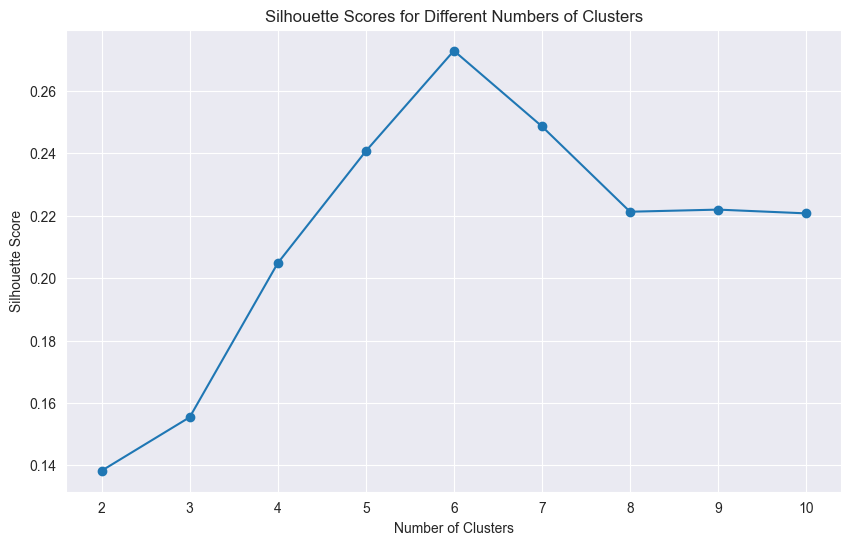

In [502]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data - assuming it's already in 'demographic_data'
interests = ['Sports', 'Finance', 'Politics', 'Fashion', 'Technology', 'Travel']
data_for_clustering = demographic_data[interests]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Range of clusters to try
cluster_range = range(2, 11)

# Empty list to store Silhouette scores
silhouette_scores = []

# Compute Silhouette scores for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()


#### I checked the clusters and because of distribution of data these clustring are not useful as cosine similarity